# <center>Neural Netwoks</center>

## Fundamentos
Podemos entender una red neuronal mediante diferentes perspectivas:
* Una aplicadicón de Stochastic Gradient Descent con una gama de hipótesis muchísimo más amplia.
* Una red que aprenden con base a distribuciones diversas.
* Un metodo black-box para hacer predicción de datos.

Comenzamos el estudio con redes de tipo $\textit{feed forward}$ con $\textit{Back Propagation}$

El elemento básico de una red neuronal es... una neurona, también conocida como nodo. Una representación gráfica es: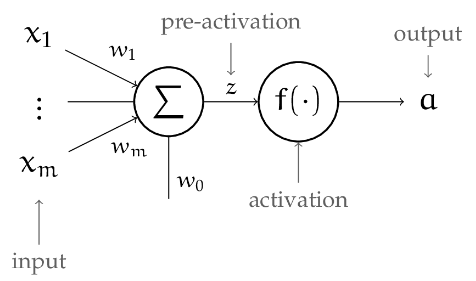.

El input es un vector $x \in \mathbb{R}^m$ y el output de una neurona es $a \in \mathbb{R}$. Algunos de los parámetros de cada nodo son $(w_1, \ldots , w_ m) \in \mathbb {R}^ m$ y un offset $w_0 \in \mathbb{R}$. En escencia estamos representando una función no lineal cualquiera $f: \mathbb{R}\mapsto\mathbb{R}$ de la forma: 
$$a = f(z) = f\left(\sum _{j=1}^ m x_ jw_ j + w_0\right) = f(w^ Tx + w_0)\; \; $$

$\textbf{¿Cómo se entrena una Neurona?}$: La idea es prácticamente la misma que anteriormente, queremos minimizar la función de pérdida $\mathcal{L}$ sobre el Data Set ajustando los $w$'s, con esto la función objetivo es 
$$J(w, w_0) = \sum _{i} \mathcal{L}\left(NN(x^{(i)}; w, w_0), y^{(i)}\right)\; \; $$
Donde $NN$ es el output de cierta neurona para determinado $x^{(i)}$.

### Layer

Ahora estamos interesados en buscar la unión de $n$ neuronas interconectadas, de esta forma, todas se alimentan de un vector input $x \in \mathbb {R}^ m$ y cada neurona tiene sus propios $w$'s para sacar un output $a$ por neuona, tal que si juntamos todas las neuronas de la capa el output es un vector $A$ con $n$ componentes (igual al número de neuronas de la capa).
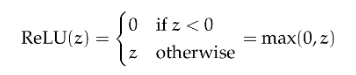.

Como necesitamos definir tantos pesos, y tantos offset, conviene organizarlos matricialmente, de esta forma una capa queda totalmente definida por: 
* $W$ una matriz de tamaño $m \times n$ con los pesos de cada neurona en cada fila 
* $W_0$ un vector $n\times 1$ con el offset de cada neurona
* $X$ el input 
* $Z=W^TX+W_0$ se conoce como pre-activation 
* $A=f(Z)$ un vector de tamaño $n\times 1$ que es el output.

El caracter de no lienalidad de las redes neuronales está ligado a la unión de muchas capas.

### Network

La idea es utilizar recursivamente las capas, vamos a denotar con $l$ el nombre de cada capa, de esta manera, una Network con $L$ capas se puede representar: 
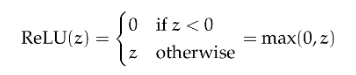

Podemos ver que el output de la capa $l-1$: $A^{l-1}$ es el input de la capa $l$: $X^{l}$. Así, la última capa puede tener output $A^L$ del tamaño que se le indique, es decir, un vector o un escalar.



### Activation Functions

Es muy importante para la no linealidad de la red neuronal cómo se haga la definición de la $f$ de cada layer, para esto, la función identidad por ejemplo no es para nada útil.
Por eso, veamos algunas funciones de activación útiles:
* $\textbf{Step Function}:$ Básicamente el on y off que se utiliza en el perceptron (acá no es muy útil).
* $\textbf{Rectified linear unit}$: (ReLU$(z)$)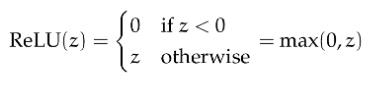 
* $\textbf{Sigmoid Function}$: (Función Logística) Cuando empezaron a crear NN, querían steṕ function sencillos, pero en este caso no se podrían utilizar gradient descent. Por eso se usa la sigmoide como si fuera una step pero smooth.$$\sigma(z)=\frac{1}{1+e^{-z}}$$
* $\textbf{Hyperbolic tangent}$: Esta es otra forma de tener una función step pero que se comporta diferente y está en el rango $[-1,1]$.$$\text{tanh}(z)=\frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}$$.
* $\textbf{Softmax Function}$: Toma un vector entero $Z \in \mathbb{R}^n$ y genera $A \in [0,1]^n$ tal que la suma de todas las componentes de $A$ suman $1$, así que se puede interpretar como probabilidades de que ocurra cada componente.

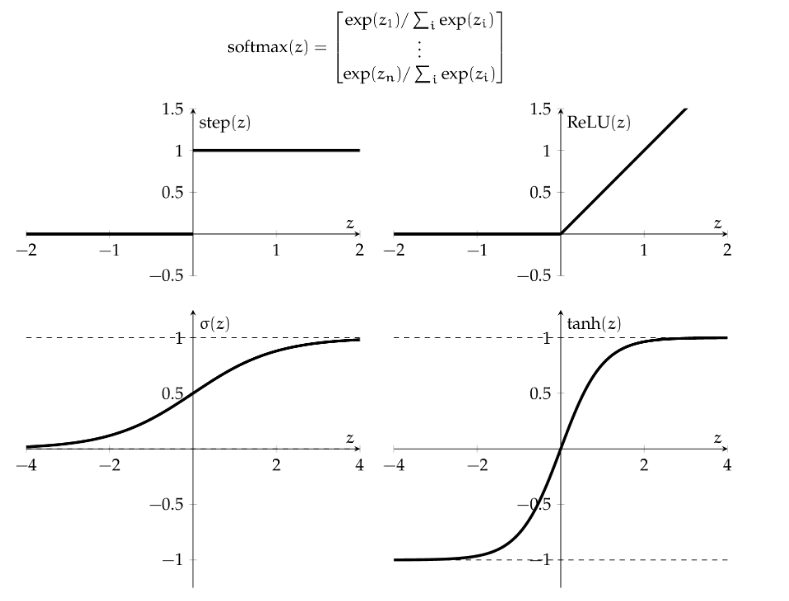
De igual forma, vale la pena tener en cuenta que la activation function de la última capa debería ser diferente para que de cuenta de la forma final que debe tener el output de toda nuestra NN.

Conviene utilizar en la última capa algunas en específico según qué función de pérdida se haya utilizado. Algunos casados que funcionan muy bien son:
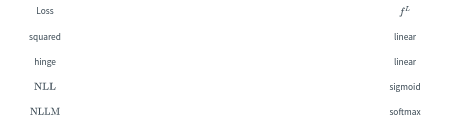

## Training: error back-propagation

Queremos minimizar la función objetivo, y para optimizarla es necesario hacer gradient descent, pero hacerlo como lo hacíamos antes es muy costoso computacionalmente, incluso el estocástico. Para simplificar la computación usamos back-prop (la misma vaina que regla de la cadena). $$$$
Para ejecutar el algo, regordemos cómo depende la función de pérdida $\mathcal{L}$ de los pesos de la última capa $W ^L$ con el otuput $A^L$:
$$\frac{\partial \mathcal{L}}{\partial W^ L} = \underbrace{ \frac{\partial \mathcal{L}}{\partial A^ L}}_{\text {depends on loss function}} \cdot \underbrace{\frac{\partial A^ L}{\partial Z^ L}}_{f^{L'}} \cdot \underbrace{\frac{\partial Z^ L}{\partial W^ L}}_{\text {$A^{L-1}$}} \; \; $$
Y para estar pendientes de la dimensión de cada término: 
$$\underbrace{\frac{\partial \text {loss}}{\partial W^ l}}_{m^ l \times n^ l} = \underbrace{A^{l-1}}_{m^ l \times 1} \;  \underbrace{\left(\frac{\partial \text {loss}}{\partial Z^ l}\right)^ T}_{1 \times n^ l}$$

Es decir, para encontrar el gradiente basta buscar $\frac{\partial\mathcal{L}}{\partial Z^l}$. Entonces el gradiente se reduce a:
$$\frac{\partial \mathcal{L}}{\partial Z^1} = \underbrace{\underbrace{ \frac{\partial \mathcal{L}}{\partial A^ L} \cdot \frac{\partial A^ L}{\partial Z^ L} \cdot \frac{\partial Z^ L}{\partial A^{L-1}} \cdot \frac{\partial A^{L-1}}{\partial Z^{L-1}} \cdot \cdots \cdot \frac{\partial A^2}{\partial Z^2}}_{\partial \text {loss} / \partial Z^2} \cdot \frac{\partial Z^2}{\partial A^1}} _{\partial \text {loss} / \partial A^1} \cdot \frac{\partial A^1}{\partial Z^1} \; \; $$

O reescribiendo:
    $$\frac{\partial \mathcal{L}}{\partial Z^ l} = \frac{\partial A^ l}{\partial Z^ l} \cdot W^{l+1} \cdot \frac{\partial A^{l+1}}{\partial Z^{l+1}} \cdot \ldots W^{L-1} \cdot \frac{\partial A^{L-1}}{\partial Z^{L-1}} \cdot W^{L} \cdot \frac{\partial A^{L}}{\partial Z^{L}} \cdot \frac{\partial \mathcal{L}}{A^ L}\; \; $$
    
 Por eso es quese conoce como back propagation, por que primero se ejecuta la red, y después se ajustan los pesos en dirección contraria como muestra la figura: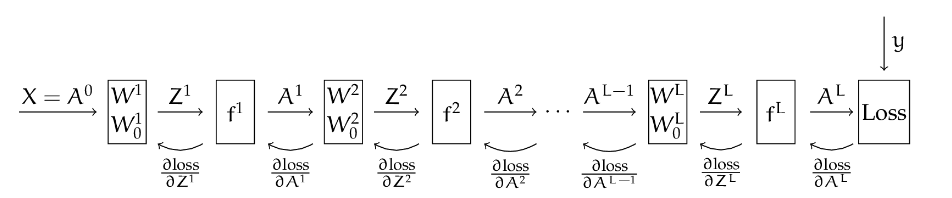
Hay un par de cosas de las que tenemos que preocuparnos: la inicialización de los pesos debido a que la función $\mathcal{L}$ puede no llevarnos a un mínimo global si se eligen mal los valores iniciales. Por esta razón, conviene inicializar algunos valores de peso aleatoriamente a ver qué pasa y mantener los pesos relativamente bajo.

De esta forma, el pseudocódigo que describe el algoritmo de stochastic gradient descent con Back propagation para una red feed-forward es:
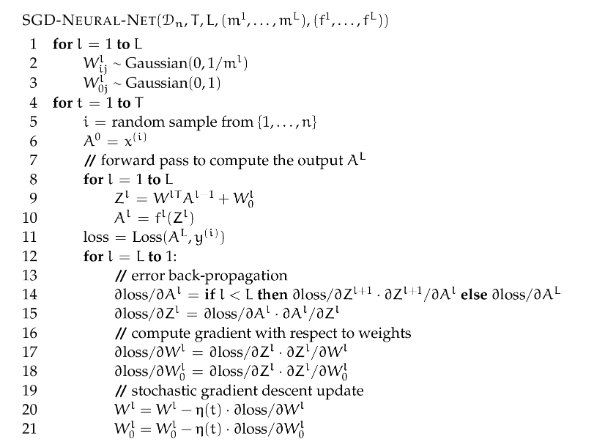